In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("placement.csv")

In [4]:
df.sample(5)

,cgpa,placement_exam_marks,placed
195,6.71,44.0,0
327,8.21,56.0,0
374,7.34,41.0,0
632,6.37,13.0,0
238,7.41,78.0,0


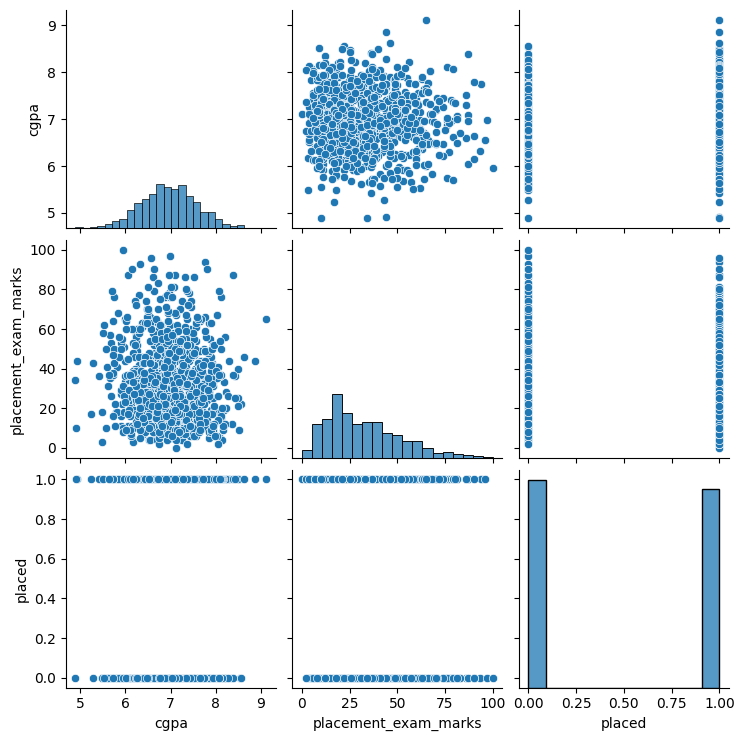

In [5]:
sns.pairplot(df)

<Axes: xlabel='placement_exam_marks', ylabel='Density'>

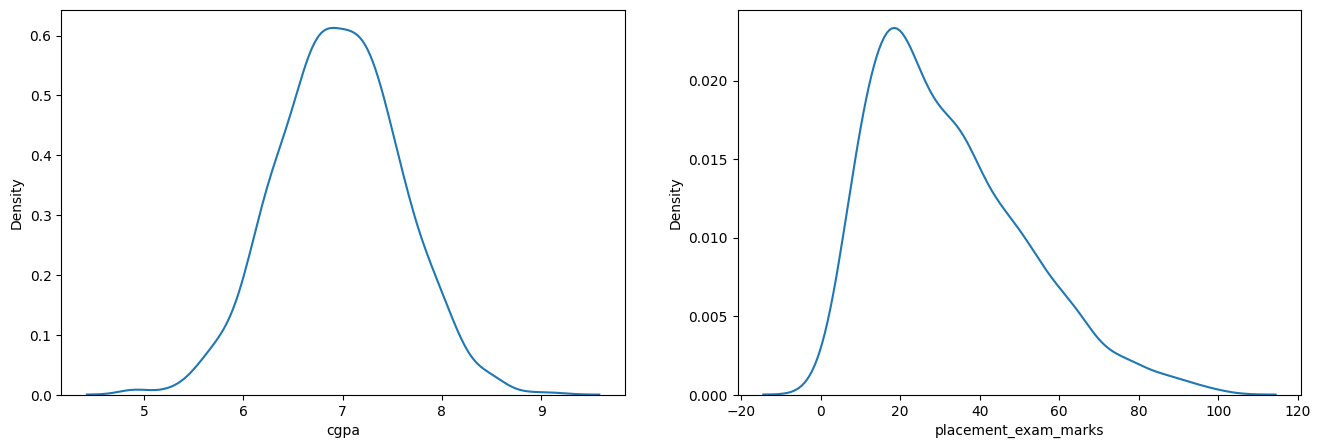

In [6]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.kdeplot(df["cgpa"])

plt.subplot(122)
sns.kdeplot(df["placement_exam_marks"])

In [8]:
print("Mean value of CGPA",df["cgpa"].mean())
print("std value of CGPA",df["cgpa"].std())
print("Min value of CGPA",df["cgpa"].min())
print("Max value of CGPA",df["cgpa"].max())

Mean value of CGPA 6.96124
std value of CGPA 0.6158978751323896
Min value of CGPA 4.89
Max value of CGPA 9.12


In [9]:
print("Highest allowed",df["cgpa"].mean()+ 3*df["cgpa"].std())
print("Highest allowed",df["cgpa"].mean()-3*df["cgpa"].std())

Highest allowed 8.808933625397168
Highest allowed 5.113546374602832


In [16]:
df[(df["cgpa"]>8.80) | (df["cgpa"]<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [17]:
import plotly.express as px
px.box(df,x="cgpa")

In [20]:
new_df=df[(df["cgpa"]<8.80) & (df["cgpa"]>5.11)]

In [21]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


Z score approach

In [22]:
df["cgpa_z"]=(df["cgpa"]-df["cgpa"].mean())/df["cgpa"].std()

In [23]:
df

,cgpa,placement_exam_marks,placed,cgpa_z
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [25]:
df[df["cgpa_z"]>3]

,cgpa,placement_exam_marks,placed,cgpa_z
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [27]:
df[df["cgpa_z"]<-3]

,cgpa,placement_exam_marks,placed,cgpa_z
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


## Capping


In [30]:
upper_limit=df["cgpa"].mean() + 3 * df["cgpa"].std()
lower_limit=df["cgpa"].mean() - 3 * df["cgpa"].std()

In [31]:
df["cgpa"]=np.where(df["cgpa"]>upper_limit,
                    upper_limit,
                    np.where(
                        df["cgpa"]<lower_limit,
                        lower_limit,
                        df["cgpa"]
                    ))

In [32]:
df

,cgpa,placement_exam_marks,placed,cgpa_z
0,7.190000,26.0,1,0.371425
1,7.460000,38.0,1,0.809810
2,7.540000,40.0,1,0.939701
3,6.420000,8.0,1,-0.878782
4,7.230000,17.0,0,0.436371
...,...,...,...,...
995,8.808934,44.0,1,3.099150
996,8.808934,65.0,1,3.505062
997,5.113546,34.0,0,-3.362960
998,8.620000,46.0,1,2.693239


In [33]:
import plotly.express as px
px.box(df,x="cgpa")

In [34]:
df.describe()

,cgpa,placement_exam_marks,placed,cgpa_z
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,6.961499,32.225000,0.489000,-1.465494e-16
std,0.612688,19.130822,0.500129,1.000000e+00
min,5.113546,0.000000,0.000000,-3.362960e+00
25%,6.550000,17.000000,0.000000,-6.677081e-01
50%,6.960000,28.000000,0.000000,-2.013321e-03
75%,7.370000,44.000000,1.000000,6.636815e-01
max,8.808934,100.000000,1.000000,3.505062e+00
